In [2]:
%pylab inline
import sympy as sp
sp.init_printing()

Populating the interactive namespace from numpy and matplotlib


In [8]:

dt        = sp.Symbol('dt')
psi_k1_k1 = sp.Symbol('\psi_{k-1 | k-1}') # roll prior
psi_k_k1  = sp.Symbol('\psi_{k   | k-1}') # roll predicted
psi_k_k   = sp.Symbol('\psi_{k   | k  }') # roll post
d_psi     = sp.Symbol('\dot{\psi}_{k-1}') # roll rate
psi_m     = sp.Symbol('\psi_m')           # mesured roll

b_psi_k1_k1  = sp.Symbol('b_{\dot{\psi}}_{k-1 | k-1}')   # roll rate bias
b_psi_k_k1   = sp.Symbol('b_{\dot{\psi}}_{k   | k-1}')   # roll rate bias
b_psi_k_k    = sp.Symbol('b_{\dot{\psi}}_{k   | k  }')   # roll rate bias

### State

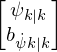

In [32]:

x_k1_k1 = sp.Matrix([ psi_k1_k1,
                      b_psi_k1_k1 ]) # prior
x_k_k1  = sp.Matrix([ psi_k_k1,
                      b_psi_k_k1  ]) # predicted
x_k_k   = sp.Matrix([ psi_k_k,
                      b_psi_k_k   ]) # post

x_k_k

### Measurement noise

In [10]:
sigma = sp.Symbol('\sigma_{m}')

# Measurement noise covariance
R = sigma * sp.eye(1)

R

### Measurement

In [11]:
z_k = sp.Matrix([ psi_m ])

z_k

### Input

In [12]:
u_k1    = sp.Matrix([ d_psi ])

u_k1

### State covariance matrix

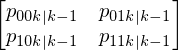

In [15]:
P_k1_k1 = sp.Matrix([ [sp.Symbol('p_' + str(i) + str(j) + '_{k-1 | k-1}') for j in [0,1] ] for i in [0,1] ])
P_k_k1  = sp.Matrix([ [sp.Symbol('p_' + str(i) + str(j) + '_{k   | k-1}') for j in [0,1] ] for i in [0,1] ])
P_k_k   = sp.Matrix([ [sp.Symbol('p_' + str(i) + str(j) + '_{k   | k  }') for j in [0,1] ] for i in [0,1] ])

P_k_k1

### Process noise covariance

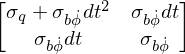

In [21]:
# Uncertainty on model
sigma_q = sp.Symbol('\sigma_q')

# Uncertainty on bias drift
sigma_b = sp.Symbol('\sigma_{b_{\dot{\phi}}}')

w = sp.Matrix([dt, 1])
Q = sigma_b * w * w.T
Q[0,0] += sigma_q

Q

---

---

# Kalman formulas

### State Prediction

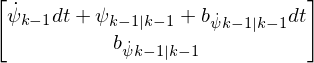

In [34]:
def f(x, u, dt):
    return sp.Matrix([ x[0] + dt*x[1] + dt*u[0],
                       x[1] ])

x_k_k1 = f( x_k1_k1, u_k1, dt )

x_k_k1

### Jacobian of State Prediction

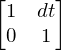

In [38]:
F = f( x_k1_k1, u_k1, dt ).jacobian( x_k1_k1 )

F

### State Covariance prediction

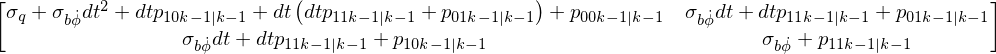

In [39]:
P_k_k1 = F * P_k1_k1 * F.T + Q

P_k_k1

### Observation fonction

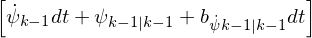

In [40]:
def h(x):
    return sp.Matrix([x[0]])

h(x_k_k1)

### Jacobian of observation function

In [41]:
H = h(x_k_k1).jacobian(x_k1_k1)

H

### Innovation

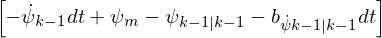

In [42]:
y = z_k - h(x_k_k1)

y

### Innovation covariance

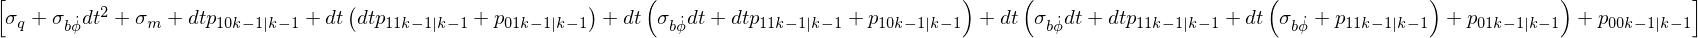

In [43]:
S = H * P_k_k1 * H.T + R

S

### Kalman gain

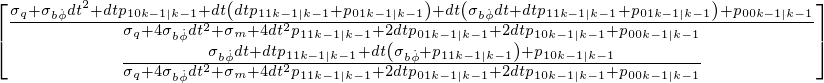

In [44]:
K = P_k_k1 * H.T * S**(-1)

K

### State Covariance update

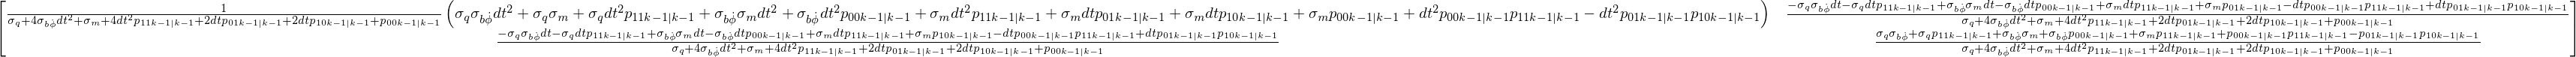

In [49]:
P_k_k = (sp.eye(2) - K * H) * P_k_k1

P_k_k.simplify()

P_k_k

### State update

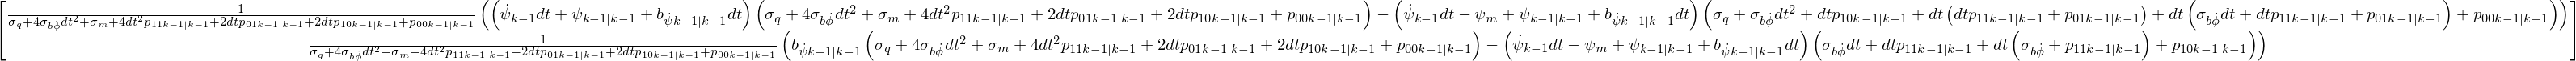

In [53]:
x_k_k = x_k_k1 + K * y

x_k_k.simplify()

x_k_k